NAMA : MUHAMMAD NAJHAN TSAANI

NIM : 231011403288

### *SOAL*

<img src="images/permintaan.png" />
<img src="images/persediaan.png" />
<img src="images/produksi.png" style="width:550px" />


Apabila proses produksi perusahaan tersebut menggunakan 6 aturan fuzzy sbb:
1. IF Permintaan TURUN And Persediaan BANYAK THEN Produksi Barang BERKURANG;
2. IF Permintaan TURUN And Persediaan SEDANG THEN Produksi Barang BERKURANG;
3. IF Permintaan TURUN And Persediaan SEDIKIT THEN Produksi Barang BERTAMBAH;
4. IF Permintaan NAIK And Persediaan BANYAK THEN Produksi Barang BERKURANG;
5. IF Permintaan NAIK And Persediaan SEDANG THEN Produksi Barang BERTAMBAH;
6. IF Permintaan NAIK And Persediaan SEDIKIT THEN Produksi Barang BETAMBAH;


 Berapa kemasan makanan jenis ABC yang harus diproduksi, jika jumlah permintaan sebanyak **<1000 -3000 >** kemasan, dan persediaan di gudang masih **<200 - 700>** kemasan?

### *INI ADALAH JAWABAN SOAL UTS NYA PAK*

disini saya mengambil nilai x permintaan = 2000, dan y persediaan = 500

kalau mau ubah nilai x dan y nya ubah pada variable X_GLOBAL dan Y_GLOBAL

In [3]:
X_GLOBAL = 2000
Y_GLOBAL = 500

def decrease(x, a, b):
    """Turun linear dari 1 di a ke 0 di b."""
    if x <= a: return 1.0
    if x >= b: return 0.0
    return (b - x) / (b - a)

def increase(x, a, b):
    """Naik linear dari 0 di a ke 1 di b."""
    if x <= a: return 0.0
    if x >= b: return 1.0
    return (x - a) / (b - a)

# ===============================
# Permintaan
# ===============================
x = X_GLOBAL
min_value = 1000
max_value = 3000

turun = decrease(x, min_value, max_value)
naik  = increase(x, min_value, max_value)

print(f"Permintaan: turun={turun:.2f}, naik={naik:.2f}")

# ===============================
# Persediaan
# ===============================
y = Y_GLOBAL
min_value = 200
mid_value = 400
max_value = 800

sedikit = decrease(y, min_value, mid_value)


if y <= min_value or y >= max_value:
    sedang = 0

if y <= mid_value:
    sedang = increase(y, min_value, mid_value)
else:
    sedang = decrease(y, mid_value, max_value)

banyak = increase(y, mid_value, max_value)

print(f"Persediaan: sedikit={sedikit:.2f}, sedang={sedang:.2f}, banyak={banyak:.2f}")

Permintaan: turun=0.50, naik=0.50
Persediaan: sedikit=0.00, sedang=0.75, banyak=0.25


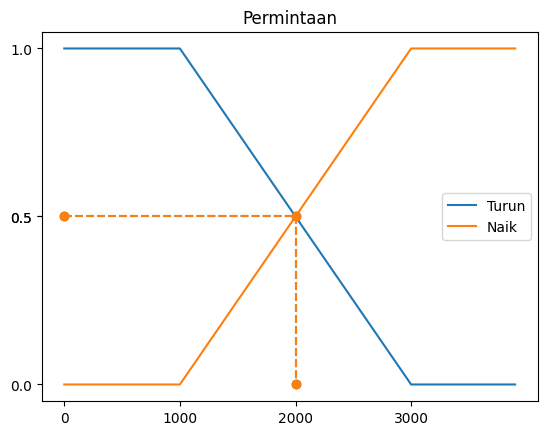

In [4]:
from matplotlib import pyplot as plt

class Permintaan():
    range = [1000, 3000]
    y_turun = [1, 0]
    y_naik = [0, 1] 

    def __init__(self, x=2000):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.x = x

    @property
    def turun(self):
        if self.x < self.min_value:
            return 1
        if self.x > self.max_value:
            return 0
        result = decrease(self.x, self.min_value, self.max_value)
        return result

    @property
    def naik(self):
        if self.x < self.min_value:
            return 0
        if self.x > self.max_value:
            return 1
        result = increase(self.x, self.min_value, self.max_value)
        return result

    def get_graph(self):

        fig, ax = plt.subplots(1)
        extended_range = [0, *self.range, self.range[1] + self.range[1]*0.3]
        extended_y_turun = [self.y_turun[0], *self.y_turun, self.y_turun[-1]]
        extended_y_naik = [self.y_naik[0], *self.y_naik, self.y_naik[-1]]
        # turun
        x_turun = extended_range # nilai x
        y_turun = extended_y_turun # nilai y
        
        ax.plot(x_turun, y_turun, label='Turun', color='C0')

        # naik
        x_naik = extended_range # nilai x
        y_naik = extended_y_naik # nilai y
        
        ax.plot(x_naik, y_naik, label='Naik', color='C1')
    
        ax.set_title('Permintaan')
        ax.legend(loc='center right')
        
        x_ticks = [0, 1000, 3000]
        y_ticks = [1, 0]
        
        plt.setp(ax, xticks= x_ticks, yticks=y_ticks)
        
        if self.x:
            x_fuzzy = [0, self.x, self.x]
            y_fuzzy_turun = [self.turun, self.turun, 0]
            ax.plot(x_fuzzy, y_fuzzy_turun,'o--', color='C0')
            y_fuzzy_naik = [self.naik, self.naik, 0]
            ax.plot(x_fuzzy, y_fuzzy_naik,'o--', color='C1')
            x_ticks.append(self.x)
            y_ticks = [*y_ticks, self.turun, self.naik]
        
        plt.setp(ax, xticks= x_ticks, yticks=y_ticks)



pmt = Permintaan(X_GLOBAL)


pmt.get_graph()


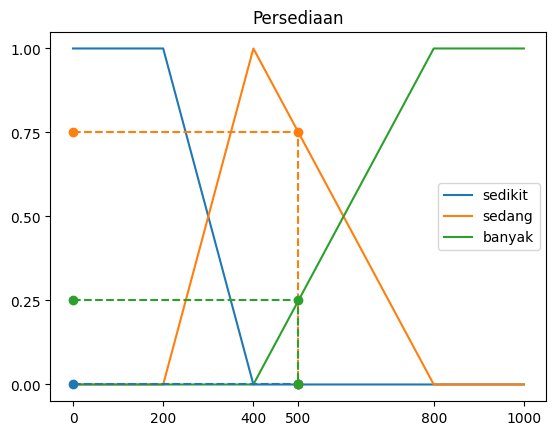

In [5]:
class Persediaan():
    pts = dict(min=200, mid=400, max=800)

    def __init__(self, y=500):
        self.min_value = self.pts["min"]   # 200
        self.mid_value = self.pts["mid"]   # 400
        self.max_value = self.pts["max"]   # 800
        self.y = y

    
    @property
    def sedikit(self):
        # 200-400: turun linear
        if self.y <= self.min_value: return 1.0
        if self.y >= self.mid_value: return 0.0
        return decrease(self.y, self.min_value, self.mid_value)

    @property
    def sedang(self):
        # 200-400 naik, 400-800 turun linear
        if self.y <= self.min_value or self.y >= self.max_value: 
            return 0.0
        if self.y <= self.mid_value:
            return increase(self.y, self.min_value, self.mid_value)
        return decrease(self.y, self.mid_value, self.max_value)

    @property
    def banyak(self):
        # 400-800 naik linear
        if self.y <= self.mid_value: return 0.0
        if self.y >= self.max_value: return 1.0
        return increase(self.y, self.mid_value, self.max_value)

    # ----- plot -----
    def get_graph(self):
        fig, ax = plt.subplots(1)

        
        right = self.max_value + 200
        xs = [0, self.min_value, self.mid_value, self.max_value, right]

        # kurva 'sedikit'
        y_sedikit = [1, 1, 0, 0, 0]
        ax.plot(xs, y_sedikit, label='sedikit', color='C0')

        # kurva 'sedang' 
        y_sedang  = [0, 0, 1, 0, 0]
        ax.plot(xs, y_sedang, label='sedang', color='C1')

        # kurva 'banyak' 
        y_banyak  = [0, 0, 0, 1, 1]
        ax.plot(xs, y_banyak, label='banyak', color='C2')

        
        ax.set_title('Persediaan')
        ax.legend(loc='center right')

        
        x_ticks = [0, self.min_value, self.mid_value, self.max_value, right]
        y_ticks = [0, 0.25, 0.5, 0.75, 1]
        plt.setp(ax, xticks=x_ticks, yticks=y_ticks)

        
        if self.y is not None:
            x_fuzzy = [0, self.y, self.y]
            # sedikit
            ax.plot(x_fuzzy, [self.sedikit, self.sedikit, 0], 'o--', color='C0')
            # sedang
            ax.plot(x_fuzzy, [self.sedang,  self.sedang,  0], 'o--', color='C1')
            # banyak
            ax.plot(x_fuzzy, [self.banyak,  self.banyak,  0], 'o--', color='C2')

            x_ticks.append(self.y)
            y_ticks.extend([self.sedikit, self.sedang, self.banyak])
            plt.setp(ax, xticks=sorted(set(x_ticks)), yticks=sorted(set(y_ticks)))

        plt.show()



psd = Persediaan(Y_GLOBAL)   # ubah y kalau mau cek kasus lain

psd.get_graph()

In [6]:
class Produksi():
    range = [2000, 7000]

    def __init__(self, permintaan: Permintaan, persediaan: Persediaan):
        self.min_value = self.range[0]
        self.max_value = self.range[1]
        self.permintaan = permintaan
        self.persediaan = persediaan
        self.z = None  # hasil defuzzifikasi nanti akan disimpan di sini

    # ---------------- Properti alias ----------------
    @property
    def pmt_naik(self):   return self.permintaan.naik
    @property
    def pmt_turun(self):  return self.permintaan.turun
    @property
    def psd_sedikit(self): return self.persediaan.sedikit
    @property
    def psd_sedang(self):  return self.persediaan.sedang
    @property
    def psd_banyak(self):  return self.persediaan.banyak

    # ---------------- Rumus konsekuen ----------------
    def berkurang(self, fuzzy_value):
        # z menurun linear dari max ke min
        return self.max_value - fuzzy_value * (self.max_value - self.min_value)

    def bertambah(self, fuzzy_value):
        # z meningkat linear dari min ke max
        return fuzzy_value * (self.max_value - self.min_value) + self.min_value

    # ---------------- Inferensi 6 Rule ----------------
    def rule(self):
        prod_fuzzy1 = min(self.pmt_turun, self.psd_banyak)
        prod_value1 = self.berkurang(prod_fuzzy1)

        prod_fuzzy2 = min(self.pmt_turun, self.psd_sedang)
        prod_value2 = self.berkurang(prod_fuzzy2)

        prod_fuzzy3 = min(self.pmt_turun, self.psd_sedikit)
        prod_value3 = self.bertambah(prod_fuzzy3)

        prod_fuzzy4 = min(self.pmt_naik, self.psd_banyak)
        prod_value4 = self.berkurang(prod_fuzzy4)

        prod_fuzzy5 = min(self.pmt_naik, self.psd_sedang)
        prod_value5 = self.bertambah(prod_fuzzy5)

        prod_fuzzy6 = min(self.pmt_naik, self.psd_sedikit)
        prod_value6 = self.bertambah(prod_fuzzy6)
        
        print(f"{prod_fuzzy1=}, {prod_fuzzy2=}, {prod_fuzzy3=}, {prod_fuzzy4=}, {prod_fuzzy5=}, {prod_fuzzy6=}")
        print(f"{prod_value1=}, {prod_value2=}, {prod_value3=}, {prod_value4=}, {prod_value5=}, {prod_value6=}")

        prod_fuzzy = [prod_fuzzy1, prod_fuzzy2, prod_fuzzy3, prod_fuzzy4, prod_fuzzy5, prod_fuzzy6]
        prod_value = [prod_value1, prod_value2, prod_value3, prod_value4, prod_value5, prod_value6]
        return prod_fuzzy, prod_value

    # ---------------- Defuzzifikasi ----------------
    def defuzifikasi(self):
        prod_fuzzy, prod_value = self.rule()
        self.z = int(sum(prod_fuzzy[i] * prod_value[i] for i in range(len(prod_fuzzy))) /
                     sum(prod_fuzzy))
        return self.z

    # ---------------- Plot grafik ----------------
    def get_graph(self):
        fig, ax = plt.subplots(1)
        left = self.min_value - 1000
        right = self.max_value + 1000
        xs = [left, self.min_value, self.max_value, right]

        # Fungsi keanggotaan produksi
        y_berkurang = [1, 1, 0, 0]
        y_bertambah = [0, 0, 1, 1]

        # Plot garis berkurang dan bertambah
        ax.plot(xs, y_berkurang, label='Berkurang', color='C0')
        ax.plot(xs, y_bertambah, label='Bertambah', color='C1')

        # Judul & label
        ax.set_title('Produksi')
        ax.set_xlabel('Produksi (kemasan/hari)')
        ax.set_ylabel('Derajat Keanggotaan (μ)')
        ax.legend(loc='center right')

        # Tick default
        x_ticks = [left, self.min_value, self.max_value, right]
        y_ticks = [0, 0.5, 1]
        plt.setp(ax, xticks=x_ticks, yticks=y_ticks)

        # Garis bantu hasil defuzzifikasi
        if self.z:
            x_fuzzy = [self.z, self.z]
            y_fuzzy = [0, 1]
            ax.plot(x_fuzzy, y_fuzzy, '--', color='red', label=f'z* = {self.z}')
            dx = 0.05 * (self.max_value - self.min_value)
            plt.text(self.z + dx, 0.05, f'z*={self.z}', color='red', rotation=90,
                     va='bottom', ha='center')
            plt.legend()

        plt.show()


prod_fuzzy1=0.25, prod_fuzzy2=0.5, prod_fuzzy3=0.0, prod_fuzzy4=0.25, prod_fuzzy5=0.5, prod_fuzzy6=0.0
prod_value1=5750.0, prod_value2=4500.0, prod_value3=2000.0, prod_value4=5750.0, prod_value5=4500.0, prod_value6=2000.0
Hasil Defuzzifikasi (z*) = 4916


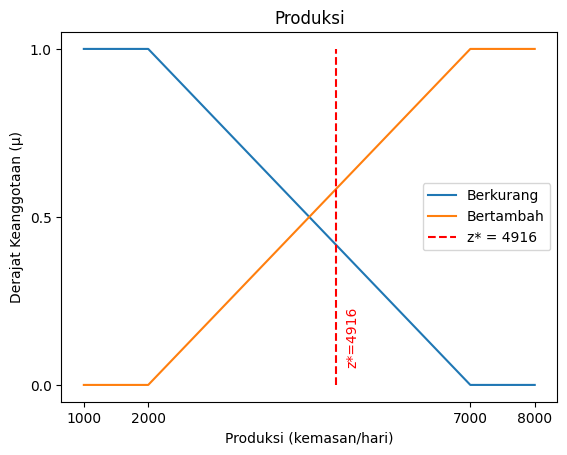

In [7]:
pmt = Permintaan()
psd = Persediaan()
prd = Produksi(pmt, psd)

# contoh nilai
pmt.x = X_GLOBAL
psd.y = Y_GLOBAL

z_star = prd.defuzifikasi()
print(f"Hasil Defuzzifikasi (z*) = {z_star}")

prd.get_graph()